<a href="https://colab.research.google.com/github/muhammmad-al/decentralized-ai-content-recommender/blob/main/reddit_federated_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Cell 1: First, make sure we're in the content directory and remove everything
%cd /content
!rm -rf *  # This removes all files and directories in /content

# Now clone fresh and cd to the correct directory
!git clone https://github.com/muhammmad-al/decentralized-ai-content-recommender.git
%cd decentralized-ai-content-recommender
!pwd  # Print working directory
!ls  # List contents

/content
Cloning into 'decentralized-ai-content-recommender'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 6), reused 17 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 251.29 KiB | 6.28 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/decentralized-ai-content-recommender
/content/decentralized-ai-content-recommender
data				    reddit_scraper_AI.py     reddit_scraper_web3.py
reddit_federated_recommender.ipynb  reddit_scraper_music.py


In [14]:
# Cell 2: Check the data directory contents
!ls data/raw

reddit_analysis_ai.csv	reddit_analysis_music.csv  reddit_analysis_web3.csv


In [15]:
#Cell 3: Install required packages
!pip install pandas numpy scikit-learn torch transformers matplotlib seaborn

In [16]:
# Cell 4: Import libraries and load data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Load datasets
ai_data = pd.read_csv('data/raw/reddit_analysis_ai.csv')
music_data = pd.read_csv('data/raw/reddit_analysis_music.csv')
web3_data = pd.read_csv('data/raw/reddit_analysis_web3.csv')

# Print shapes to verify loading
print("Shapes of datasets:")
print(f"AI data: {ai_data.shape}")
print(f"Music data: {music_data.shape}")
print(f"Web3 data: {web3_data.shape}")

Shapes of datasets:
AI data: (200, 17)
Music data: (300, 17)
Web3 data: (200, 17)


In [19]:
# Cell 5: Add category labels and combine datasets
# Add category labels
ai_data['category'] = 'ai'
music_data['category'] = 'music'
web3_data['category'] = 'web3'

# Combine datasets
combined_data = pd.concat([ai_data, music_data, web3_data], ignore_index=True)

# Display basic information about the combined dataset
print("\nCombined Dataset Info:")
print(combined_data.info())

# Display column names and sample data
print("\nColumns in the dataset:")
print(combined_data.columns.tolist())
print("\nSample of combined data:")
display(combined_data.head())


Combined Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  700 non-null    object 
 1   cleaned_text           439 non-null    object 
 2   original_text          449 non-null    object 
 3   score                  700 non-null    int64  
 4   num_comments           700 non-null    int64  
 5   upvote_ratio           700 non-null    float64
 6   timestamp              700 non-null    object 
 7   author                 700 non-null    object 
 8   hashtags               700 non-null    object 
 9   hashtag_count          700 non-null    int64  
 10  text_length            700 non-null    int64  
 11  account_age            699 non-null    float64
 12  author_karma           699 non-null    float64
 13  author_verified        699 non-null    object 
 14  textblob_sentiment     700 non-nul

,title,cleaned_text,original_text,score,num_comments,upvote_ratio,timestamp,author,hashtags,hashtag_count,text_length,account_age,author_karma,author_verified,textblob_sentiment,transformer_sentiment,transformer_score,category
0,"Daily Crypto Discussion - November 9, 2024 (GM...",welcome to the daily crypto discussion thread ...,**Welcome to the Daily Crypto Discussion threa...,8,63,1.00,2024-11-08 19:00:30,CryptoDaily-,"['#Disclaimer', '#Rules', '#Useful']",3,1966,905.0,27705.0,True,0.101466,NEGATIVE,0.999248,ai
1,Deutsche central bank joins Singapore’s Projec...,NaN,NaN,1,2,0.57,2024-11-08 18:26:03,jack-jackson-the2nd,[],0,0,281.0,5143.0,True,0.000000,POSITIVE,0.748121,ai
2,We just surpassed Meta and are back in the Top...,NaN,NaN,23,8,0.83,2024-11-08 17:51:02,CriticalCobraz,[],0,0,207.0,2697.0,True,0.000000,POSITIVE,0.748121,ai
3,Internet Computer and Chainlink Dominate the C...,NaN,NaN,0,13,0.37,2024-11-08 16:55:30,goldyluckinblokchain,[],0,0,1051.0,95577.0,True,0.000000,POSITIVE,0.748121,ai
4,FTX tries to reclaim $11M from Crypto.com-cont...,NaN,NaN,0,5,0.41,2024-11-08 16:43:28,partymsl,[],0,0,1597.0,338078.0,True,0.000000,POSITIVE,0.748121,ai


In [20]:
# Cell 6: Check for missing values and basic statistics
# Check missing values
print("Missing values in each column:")
print(combined_data.isnull().sum())

# Display basic statistics for numeric columns
print("\nBasic statistics:")
display(combined_data.describe())

Missing values in each column:
title                      0
cleaned_text             261
original_text            251
score                      0
num_comments               0
upvote_ratio               0
timestamp                  0
author                     0
hashtags                   0
hashtag_count              0
text_length                0
account_age                1
author_karma               1
author_verified            1
textblob_sentiment         0
transformer_sentiment      0
transformer_score          0
category                   0
dtype: int64

Basic statistics:


,score,num_comments,upvote_ratio,hashtag_count,text_length,account_age,author_karma,textblob_sentiment,transformer_score
count,700.000000,700.000000,700.000000,700.000000,700.000000,699.000000,6.990000e+02,700.000000,700.000000
mean,36.757143,20.508571,0.807814,0.035714,392.715714,1498.639485,5.162666e+04,0.075186,0.884514
std,134.361558,75.084644,0.230246,0.378437,676.916890,1190.368678,3.711202e+05,0.154280,0.123973
min,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,-3.300000e+01,-0.850000,0.515718
25%,1.000000,2.000000,0.707500,0.000000,0.000000,588.000000,1.620000e+02,0.000000,0.748121
50%,3.000000,5.000000,0.900000,0.000000,184.500000,1304.000000,2.095000e+03,0.000000,0.971824
75%,13.000000,12.000000,1.000000,0.000000,519.500000,2048.000000,2.133050e+04,0.141678,0.997329
max,1855.000000,1099.000000,1.000000,7.000000,8662.000000,6218.000000,9.307790e+06,0.766667,0.999851


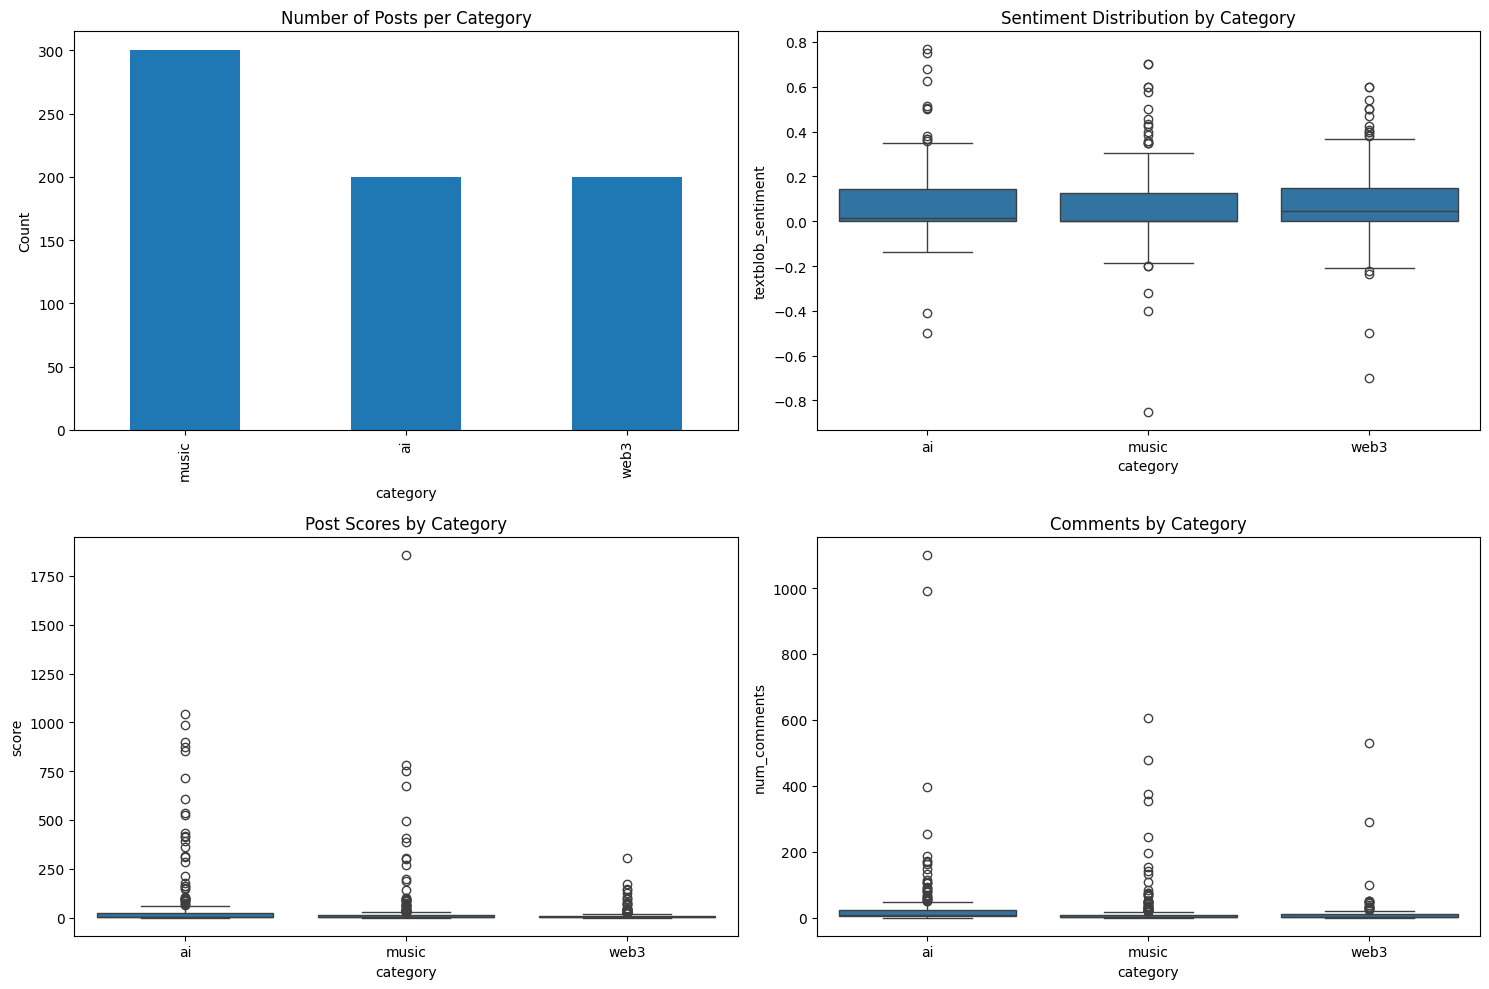

In [21]:
# Cell 7: Create visualizations for initial data analysis
plt.figure(figsize=(15, 10))

# 1. Posts per Category
plt.subplot(2, 2, 1)
combined_data['category'].value_counts().plot(kind='bar')
plt.title('Number of Posts per Category')
plt.ylabel('Count')

# 2. Sentiment Distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=combined_data, x='category', y='textblob_sentiment')
plt.title('Sentiment Distribution by Category')

# 3. Engagement Metrics
plt.subplot(2, 2, 3)
sns.boxplot(data=combined_data, x='category', y='score')
plt.title('Post Scores by Category')

# 4. Comments Distribution
plt.subplot(2, 2, 4)
sns.boxplot(data=combined_data, x='category', y='num_comments')
plt.title('Comments by Category')

plt.tight_layout()
plt.show()

Text length statistics by category:
          count        mean         std   min    25%    50%    75%     max
category                                                                  
ai        121.0  646.206612  616.180438  28.0  274.0  473.0  838.0  4886.0
music     167.0  513.664671  762.009879   5.0  184.0  325.0  582.0  8662.0
web3      151.0  734.622517  857.202914  10.0  198.0  450.0  908.5  4073.0


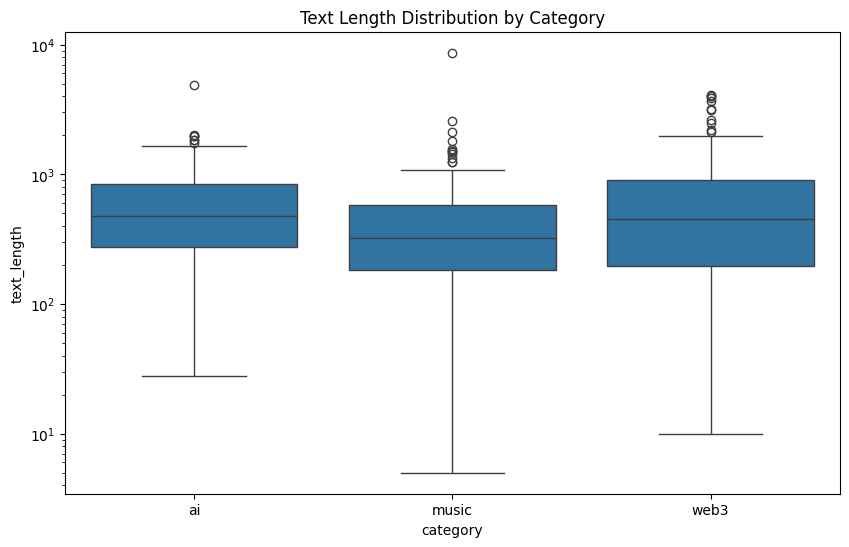

In [22]:
# Cell 8: Text Analysis
# Add text length feature
combined_data['text_length'] = combined_data['cleaned_text'].str.len()

# Text statistics by category
print("Text length statistics by category:")
print(combined_data.groupby('category')['text_length'].describe())

# Visualize text length distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='category', y='text_length')
plt.title('Text Length Distribution by Category')
plt.yscale('log')  # Use log scale for better visualization
plt.show()

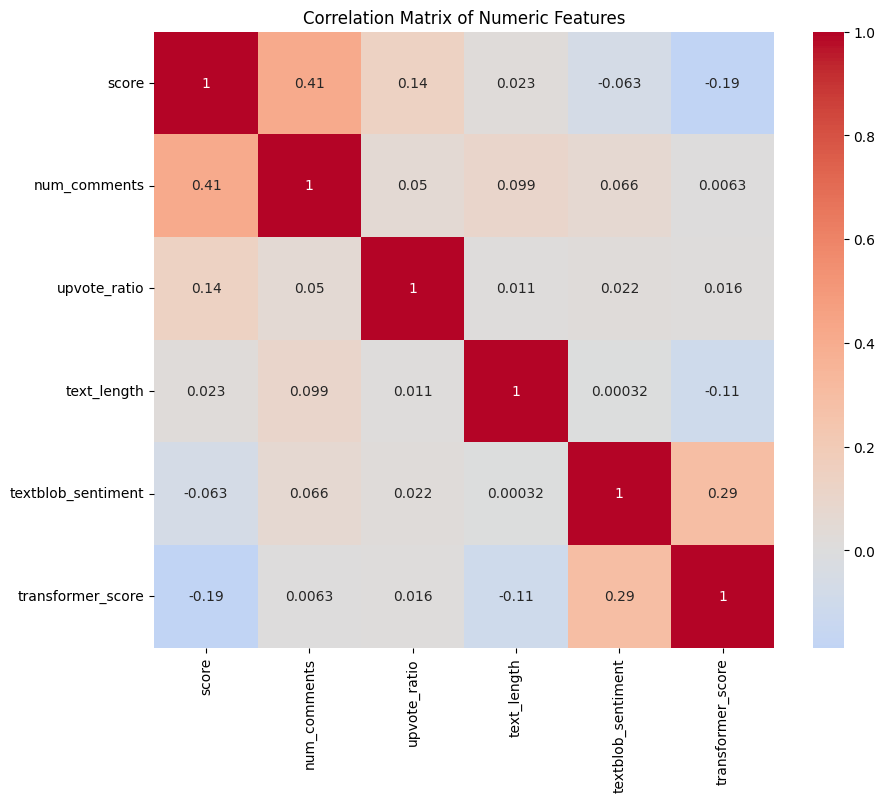

In [23]:
# Cell 9: Correlation Analysis
# Select numeric columns
numeric_columns = ['score', 'num_comments', 'upvote_ratio', 'text_length',
                  'textblob_sentiment', 'transformer_score']

# Create correlation matrix
correlation_matrix = combined_data[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [24]:
# Cell 10: Prepare data for modeling
def prepare_features(df):
    """Prepare features for modeling"""
    # Handle missing values
    df['cleaned_text'] = df['cleaned_text'].fillna('')

    # Text vectorization
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    text_features = vectorizer.fit_transform(df['cleaned_text'])

    # Prepare numeric features
    numeric_features = ['score', 'num_comments', 'upvote_ratio',
                       'textblob_sentiment', 'transformer_score']

    # Scale numeric features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[numeric_features])

    # Combine features
    final_features = np.hstack([scaled_features, text_features.toarray()])

    return final_features, vectorizer, scaler

# Prepare features
features, vectorizer, scaler = prepare_features(combined_data)

print("Final feature matrix shape:", features.shape)
print("\nFeature types included:")
print(f"- Numeric features: {5}")
print(f"- Text features: {features.shape[1] - 5}")

Final feature matrix shape: (700, 1005)

Feature types included:
- Numeric features: 5
- Text features: 1000


In [25]:
# Cell 11: Enhanced Data Cleaning
def clean_dataset(df):
    # Handle missing text
    df['cleaned_text'] = df['cleaned_text'].fillna(df['title'])

    # Handle other missing values
    df['account_age'] = df['account_age'].fillna(df['account_age'].median())
    df['author_karma'] = df['author_karma'].fillna(df['author_karma'].median())
    df['author_verified'] = df['author_verified'].fillna('Unknown')

    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    return df

# Clean the data
cleaned_combined_data = clean_dataset(combined_data.copy())

# Verify cleaning results
print("Missing values after cleaning:")
print(cleaned_combined_data.isnull().sum())

Missing values after cleaning:
title                      0
cleaned_text               0
original_text            251
score                      0
num_comments               0
upvote_ratio               0
timestamp                  0
author                     0
hashtags                   0
hashtag_count              0
text_length              261
account_age                0
author_karma               0
author_verified            0
textblob_sentiment         0
transformer_sentiment      0
transformer_score          0
category                   0
dtype: int64


In [29]:
# Cell 12: Updated Data Quality Report
def generate_quality_report(df):
    print("Data Quality Report:")
    print("-" * 50)

    # Category balance
    print("\nCategory Distribution:")
    print(df['category'].value_counts(normalize=True))

    # Text content
    print("\nText Content Stats:")
    print(f"Posts with non-empty text: {(df['cleaned_text'].str.len() > 0).sum()}")
    print(f"Average text length: {df['cleaned_text'].str.len().mean():.2f}")

    # Engagement metrics
    print("\nEngagement Stats:")
    print(f"Average score: {df['score'].mean():.2f}")
    print(f"Average comments: {df['num_comments'].mean():.2f}")
    print(f"Average upvote ratio: {df['upvote_ratio'].mean():.2f}")

    # Sentiment distribution
    print("\nSentiment Stats:")
    print("TextBlob Sentiment Summary:")
    print(df['textblob_sentiment'].describe())

    # Sentiment by category
    print("\nAverage Sentiment by Category:")
    print(df.groupby('category')['textblob_sentiment'].mean())

# Generate updated report
generate_quality_report(cleaned_combined_data)

Data Quality Report:
--------------------------------------------------

Category Distribution:
category
music    0.428571
ai       0.285714
web3     0.285714
Name: proportion, dtype: float64

Text Content Stats:
Posts with non-empty text: 439
Average text length: 392.72

Engagement Stats:
Average score: 36.76
Average comments: 20.51
Average upvote ratio: 0.81

Sentiment Stats:
TextBlob Sentiment Summary:
count    700.000000
mean       0.075186
std        0.154280
min       -0.850000
25%        0.000000
50%        0.000000
75%        0.141678
max        0.766667
Name: textblob_sentiment, dtype: float64

Average Sentiment by Category:
category
ai       0.085838
music    0.064680
web3     0.080294
Name: textblob_sentiment, dtype: float64


In [27]:
# Cell 13: Feature Importance
from sklearn.ensemble import RandomForestClassifier

def analyze_feature_importance(features, labels, feature_names):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(features[:, :5], labels)  # Using only numeric features

    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': rf.feature_importances_
    })

    return importance_df.sort_values('importance', ascending=False)

# Analyze numeric feature importance
numeric_features = ['score', 'num_comments', 'upvote_ratio',
                   'textblob_sentiment', 'transformer_score']
importance_df = analyze_feature_importance(
    features[:, :5],
    cleaned_combined_data['category'],
    numeric_features
)

print("Feature Importance:")
display(importance_df)

Feature Importance:


,feature,importance
1,num_comments,0.221877
4,transformer_score,0.210940
2,upvote_ratio,0.197340
0,score,0.189104
3,textblob_sentiment,0.180738


In [28]:
# Cell 14: Fix text length calculation
# Update text_length after filling missing values
cleaned_combined_data['text_length'] = cleaned_combined_data['cleaned_text'].str.len()

# Verify fix
print("Missing values after text_length fix:")
print(cleaned_combined_data.isnull().sum())

Missing values after text_length fix:
title                      0
cleaned_text               0
original_text            251
score                      0
num_comments               0
upvote_ratio               0
timestamp                  0
author                     0
hashtags                   0
hashtag_count              0
text_length                0
account_age                0
author_karma               0
author_verified            0
textblob_sentiment         0
transformer_sentiment      0
transformer_score          0
category                   0
dtype: int64


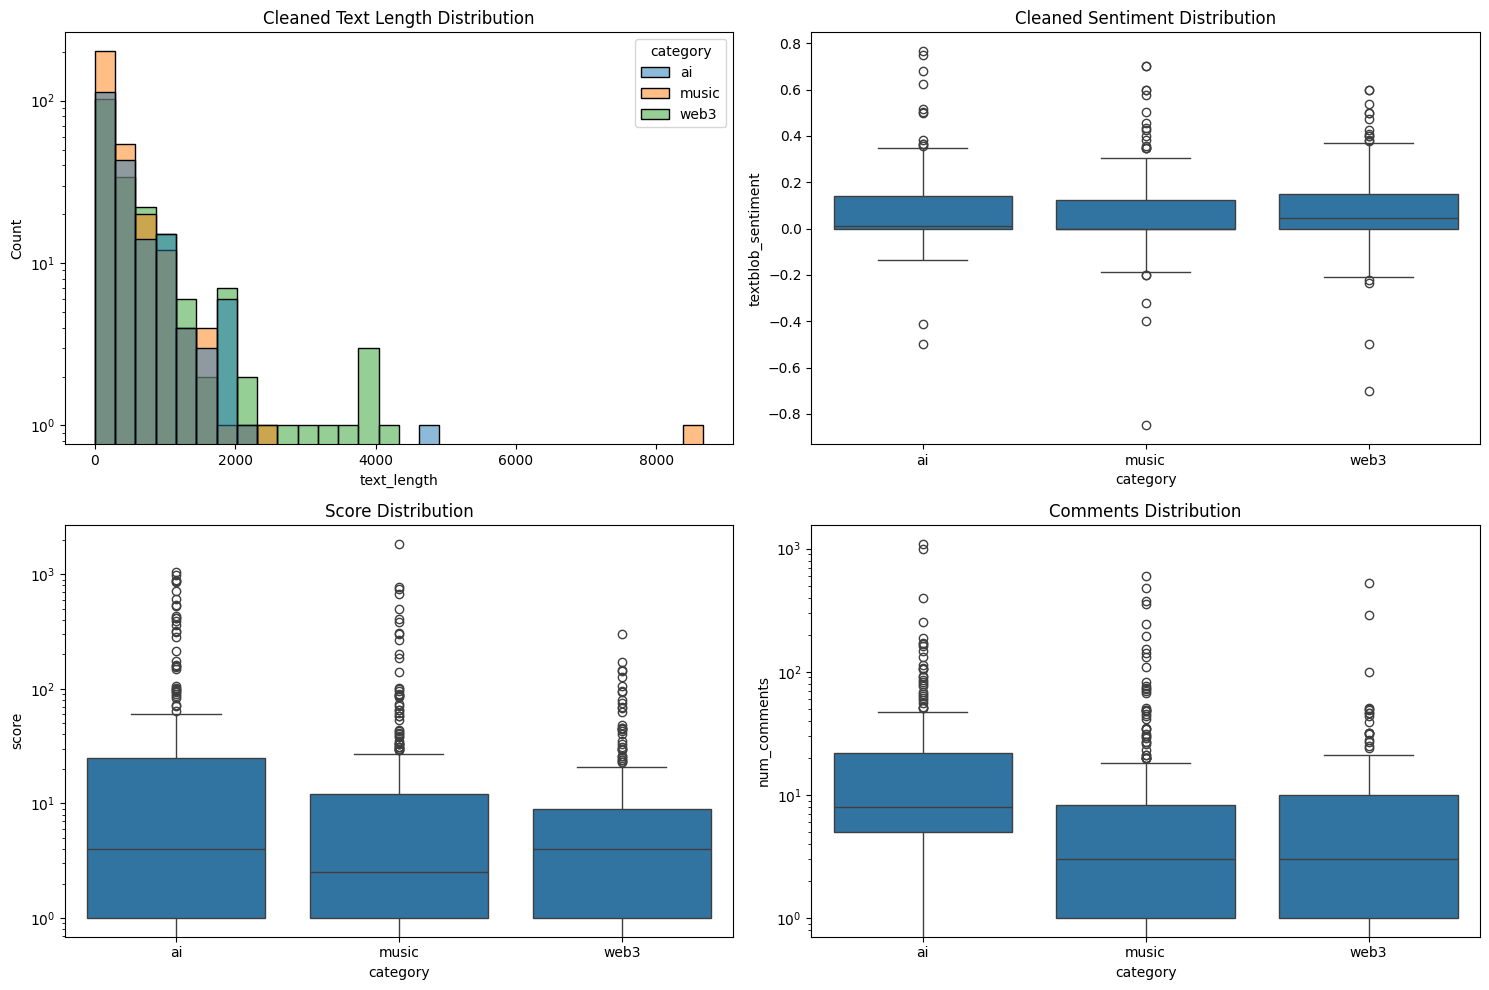

In [30]:
# Cell 16: Visualize cleaned data distributions
plt.figure(figsize=(15, 10))

# 1. Cleaned Text Length Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=cleaned_combined_data, x='text_length', hue='category', bins=30)
plt.title('Cleaned Text Length Distribution')
plt.yscale('log')

# 2. Sentiment Distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=cleaned_combined_data, x='category', y='textblob_sentiment')
plt.title('Cleaned Sentiment Distribution')

# 3. Engagement Distribution
plt.subplot(2, 2, 3)
sns.boxplot(data=cleaned_combined_data, x='category', y='score')
plt.title('Score Distribution')
plt.yscale('log')

# 4. Comments Distribution
plt.subplot(2, 2, 4)
sns.boxplot(data=cleaned_combined_data, x='category', y='num_comments')
plt.title('Comments Distribution')
plt.yscale('log')

plt.tight_layout()
plt.show()

In [31]:
# Cell 17: Summary of Data Analysis
def print_analysis_summary(df):
    print("Data Analysis Summary:")
    print("-" * 50)

    print("\n1. Dataset Balance:")
    print(f"- Total posts: {len(df)}")
    print(f"- Categories: {df['category'].nunique()}")
    print("- Distribution:", dict(df['category'].value_counts()))

    print("\n2. Content Quality:")
    print(f"- Average text length: {df['text_length'].mean():.0f} characters")
    print(f"- Posts with substantial text (>100 chars): {(df['text_length'] > 100).sum()}")

    print("\n3. Engagement Metrics:")
    print(f"- Median score: {df['score'].median():.1f}")
    print(f"- Median comments: {df['num_comments'].median():.1f}")
    print(f"- Average upvote ratio: {df['upvote_ratio'].mean():.2f}")

    print("\n4. Feature Importance Summary:")
    print("Most important features for classification:")
    for _, row in importance_df.head().iterrows():
        print(f"- {row['feature']}: {row['importance']:.3f}")

# Generate summary
print_analysis_summary(cleaned_combined_data)

Data Analysis Summary:
--------------------------------------------------

1. Dataset Balance:
- Total posts: 700
- Categories: 3
- Distribution: {'music': 300, 'ai': 200, 'web3': 200}

2. Content Quality:
- Average text length: 393 characters
- Posts with substantial text (>100 chars): 389

3. Engagement Metrics:
- Median score: 3.0
- Median comments: 5.0
- Average upvote ratio: 0.81

4. Feature Importance Summary:
Most important features for classification:
- num_comments: 0.222
- transformer_score: 0.211
- upvote_ratio: 0.197
- score: 0.189
- textblob_sentiment: 0.181


In [32]:
# Cell 18: Enhanced Data Processing
def enhance_data_quality(df):
    """Additional data cleaning and feature engineering"""
    # 1. Normalize engagement metrics
    df['score_log'] = np.log1p(df['score'])
    df['comments_log'] = np.log1p(df['num_comments'])

    # 2. Create engagement ratio feature
    df['engagement_ratio'] = df['num_comments'] / (df['score'] + 1)

    # 3. Normalize text length
    df['text_length_normalized'] = (df['text_length'] - df['text_length'].mean()) / df['text_length'].std()

    # 4. Create compound sentiment feature
    df['sentiment_compound'] = (df['textblob_sentiment'] +
                              (df['transformer_score'] * 2 - 1)) / 2

    # 5. Handle original text
    df['has_original_text'] = ~df['original_text'].isna()

    return df

# Apply enhancements
enhanced_data = enhance_data_quality(cleaned_combined_data.copy())

# Verify changes
print("Enhanced features summary:")
print(enhanced_data[['score_log', 'comments_log', 'engagement_ratio',
                    'sentiment_compound']].describe())

Enhanced features summary:
        score_log  comments_log  engagement_ratio  sentiment_compound
count  700.000000    700.000000        700.000000          700.000000
mean     1.819617      1.890913          2.581541            0.422107
std      1.595636      1.269383          6.669061            0.163984
min      0.000000      0.000000          0.000000            0.020775
25%      0.693147      1.098612          0.256008            0.248121
50%      1.386294      1.791759          0.682984            0.465486
75%      2.639057      2.564949          2.000000            0.554204
max      7.526179      7.003065         68.000000            0.879995


In [33]:
# Cell 19: Quality Verification
def verify_data_quality(df):
    """Verify data quality after enhancements"""
    print("Data Quality Verification:")
    print("-" * 50)

    # Check feature distributions
    print("\n1. Feature Distributions:")
    numeric_cols = ['score_log', 'comments_log', 'engagement_ratio',
                   'sentiment_compound', 'text_length_normalized']
    print(df[numeric_cols].describe())

    # Check category balance
    print("\n2. Category Balance:")
    print(df['category'].value_counts(normalize=True))

    # Check correlations
    print("\n3. Key Correlations:")
    correlations = df[numeric_cols].corr()
    print(correlations['sentiment_compound'].sort_values(ascending=False))

# Run verification
verify_data_quality(enhanced_data)

Data Quality Verification:
--------------------------------------------------

1. Feature Distributions:
        score_log  comments_log  engagement_ratio  sentiment_compound  \
count  700.000000    700.000000        700.000000          700.000000   
mean     1.819617      1.890913          2.581541            0.422107   
std      1.595636      1.269383          6.669061            0.163984   
min      0.000000      0.000000          0.000000            0.020775   
25%      0.693147      1.098612          0.256008            0.248121   
50%      1.386294      1.791759          0.682984            0.465486   
75%      2.639057      2.564949          2.000000            0.554204   
max      7.526179      7.003065         68.000000            0.879995   

       text_length_normalized  
count              700.000000  
mean                 0.000000  
std                  1.000000  
min                 -0.580154  
25%                 -0.580154  
50%                 -0.307594  
75%          

In [34]:
# Cell 20: Final Preparation for Modeling
def prepare_final_features(df):
    """Prepare final feature set for modeling"""
    # Select features for modeling
    model_features = [
        'score_log', 'comments_log', 'engagement_ratio',
        'sentiment_compound', 'text_length_normalized',
        'upvote_ratio', 'textblob_sentiment', 'transformer_score'
    ]

    # Create feature matrix
    X = df[model_features]
    y = df['category']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    return X_train, X_test, y_train, y_test

# Prepare final features
X_train, X_test, y_train, y_test = prepare_final_features(enhanced_data)

print("Final feature set shapes:")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Final feature set shapes:
Training set: (560, 8)
Test set: (140, 8)
